# Classification

The goal here is to classify flowers based on data recorded on some of their geometrical parameters.

In [1]:
import pandas as pd
import tensorflow as tf

## Loading and preinvestigating the dataset

In [66]:
train_data_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_data_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica'] # encoded as [0, 1, 2] in the dataset respectively

dftrain = pd.read_csv(train_data_path, names=CSV_COLUMN_NAMES, header=0)
dftest = pd.read_csv(test_data_path, names=CSV_COLUMN_NAMES, header=0)

print(dftrain.shape)
print(dftest.shape)
dftrain.head()

(120, 5)
(30, 5)


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


### train dataset

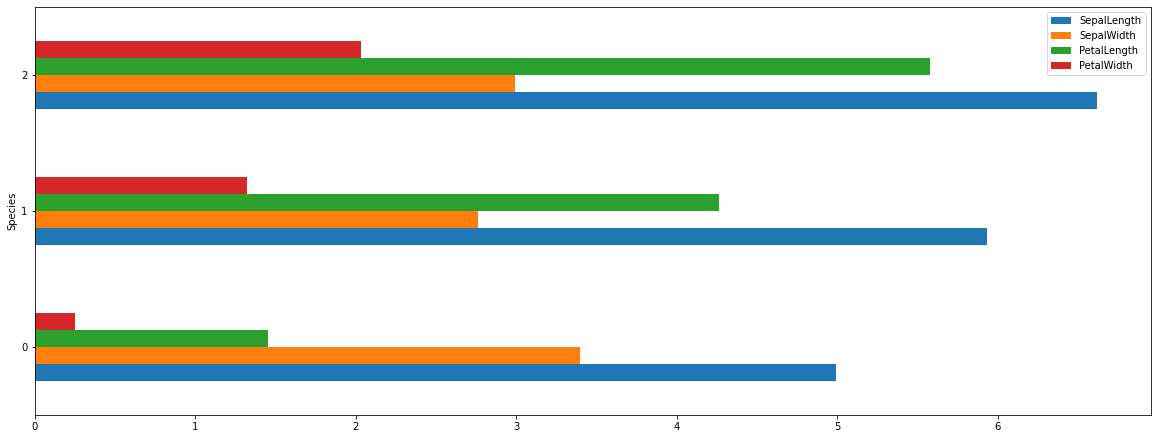

In [9]:
dftrain.groupby('Species').mean().plot(kind='barh', figsize=(20,7.5))

Remarks:

- the Species are clearly distinguishable by their mean size parameters in this dataset.

0         AxesSubplot(0.1,0.559091;0.363636x0.340909)
1    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
2             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

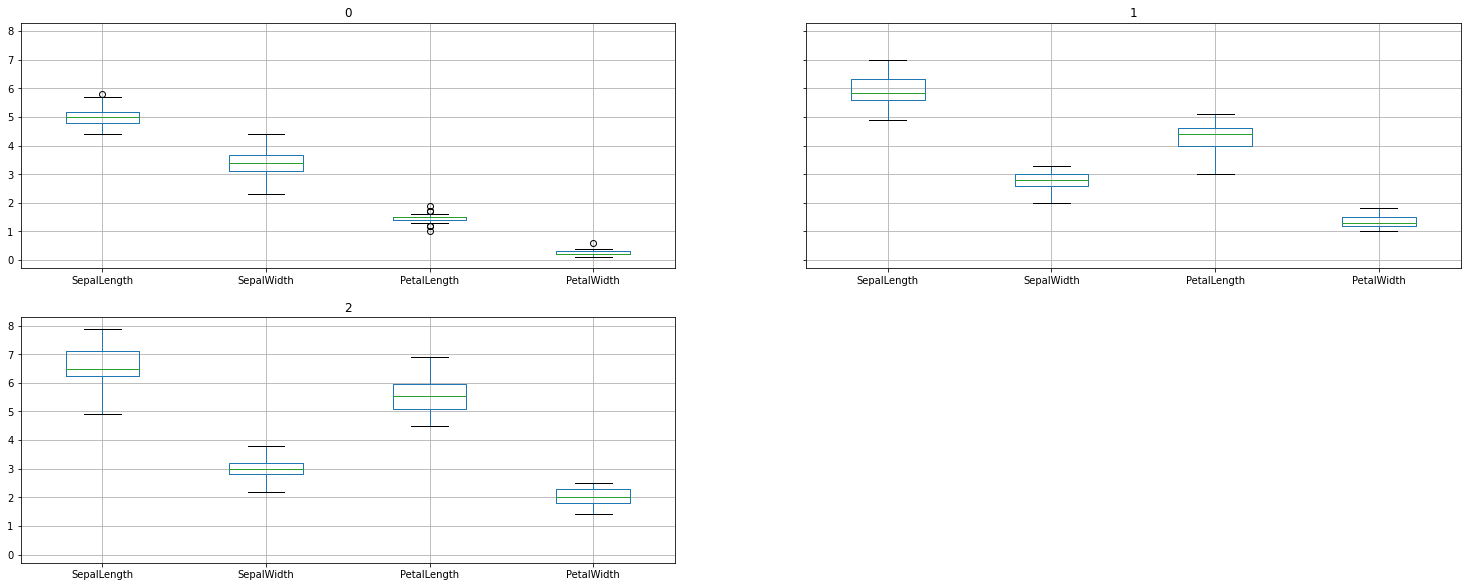

In [32]:
dftrain.groupby('Species').boxplot(column=list(dftrain.drop(columns='Species').columns), figsize=(25,10))

Remarks:

- the distribution of data in the set appears to be centrific (mean in the middle) with only few exceptions. 
- the distribution of PetalLength and PetalWidth appears to be unusually low for Species 0 (Setosa) compared to the other Species and to the other categories of Species 0.

### test dataset

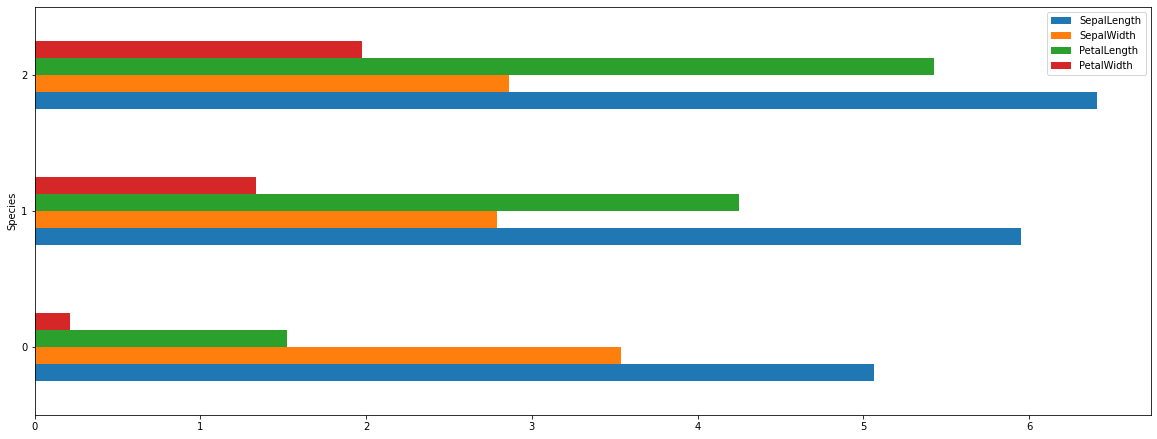

In [67]:
dftest.groupby('Species').mean().plot(kind='barh', figsize=(20,7.5))

0         AxesSubplot(0.1,0.559091;0.363636x0.340909)
1    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
2             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

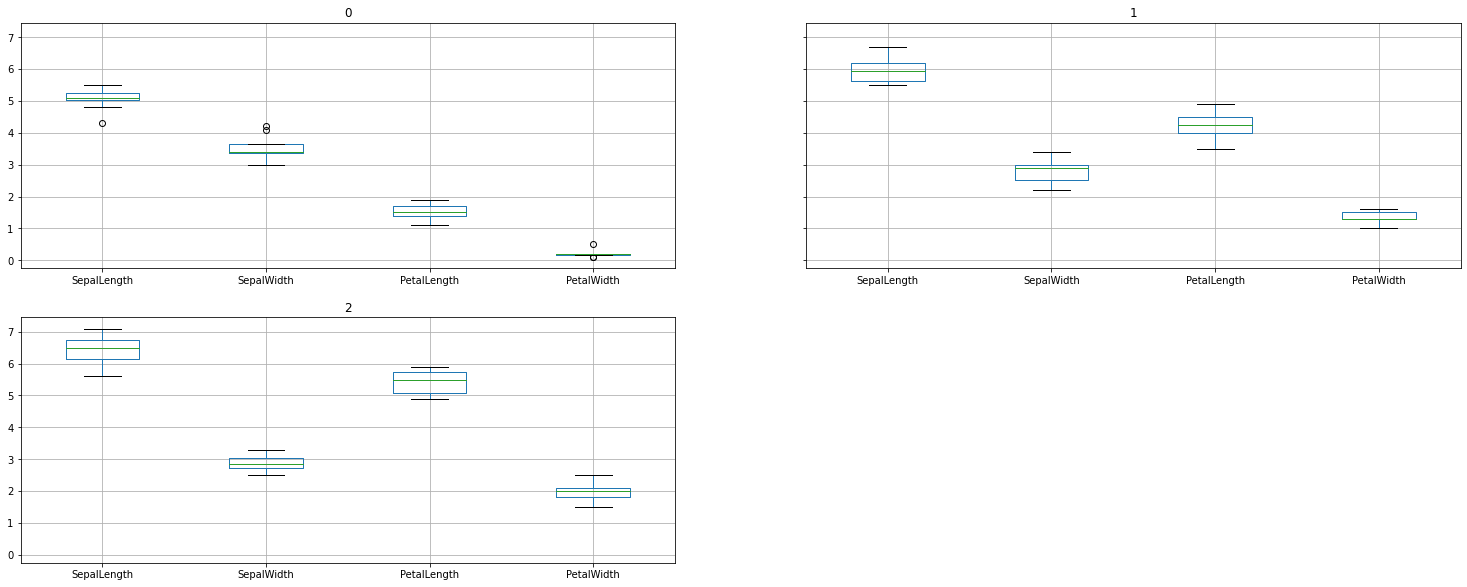

In [68]:
dftest.groupby('Species').boxplot(column=list(dftrain.drop(columns='Species').columns), figsize=(25,10))

In [69]:
y_train = dftrain.pop('Species')
y_test = dftest.pop('Species')

## Input Function

In [45]:
def input_fn(features, labels, training=True, batch_size=256):
        # convert the inputs into a dataset
        dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

        # Shuffle and reapeat if you are in training mode
        if training:
            dataset = dataset.shuffle(1000).repeat()

        return dataset.batch(batch_size)

## Feature Columns

In [35]:
feature_columns = []
for key in dftrain.keys():
    feature_columns.append(tf.feature_column.numeric_column(key=key))

for fc in feature_columns:
    print(fc)

NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)
NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


## Building the Model

Here, the 'LinearClassifier' as well as the 'DNNClassifier' (Deep Neural Network) will be applied

### creating the DNN Model

In [38]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[30, 10], # specifying two hidden layers with 30 and 10 nodes respectively.
    n_classes=3 # 3 different output classes are desired
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Lukas\\AppData\\Local\\Temp\\tmpzhzf_t93', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### training the DNN

In [46]:
classifier.train(
    input_fn=lambda: input_fn(dftrain, y_train), # using lambda: allows skipping to build a 'decorator' as in linear_regression.ipynb
    steps=5000
)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Lukas\AppData\Local\Tem

### evaluating the DNN

In [48]:
eval_result = classifier.evaluate(lambda: input_fn(dftest, y_test, training=False))
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-07T19:40:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Lukas\AppData\Local\Temp\tmpzhzf_t93\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.34618s
INFO:tensorflow:Finished evaluation at 2021-01-07-19:40:25
INFO:tensorflow:Saving dict for global step 5000: 

### making some test predictions

In [72]:
def input_fn(features, batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size) # labels can be omitted

for index in range(10):
    print("------------ Flower Number {} ------------".format(index + 1))
    unknown_flower_dict = dftest.loc[index].to_dict()
    print("Input: " + str(unknown_flower_dict))

    # creating a new dict with values as list because tensorflow expects us to have multiple values per feature
    keys = unknown_flower_dict.keys()
    unknown_flower_dict = dict(zip(keys, list([unknown_flower_dict[key]] for key in keys)))
    
    # making the prediction here. predictions is a generator object
    predictions = classifier.predict(lambda: input_fn(unknown_flower_dict)) 
    
    for prediction in predictions:
        class_id = prediction['class_ids'][0]
        probabilities = list(prediction['probabilities'])
        pred_prop = probabilities.pop(class_id) # split probabilities in prob of prediction an non-predictions
        
         # creating a list of class ids and then popping the predicted one
         # to get a list of non-class-ids
        class_ids = [0,1,2]
        class_ids.pop(class_id)
        npred_class_ids = class_ids

        print('Prediction is "{}" ({:.1f}%)'.format(SPECIES[class_id], 100 * pred_prop))

        print('Probability for others: "{}" ({:.1f}%), "{}" ({:.1f}%)'.format(
            SPECIES[npred_class_ids[0]], 100 * probabilities[0],
            SPECIES[npred_class_ids[1]], 100 * probabilities[1]))

        print('Actual value is "{}"'.format(SPECIES[y_test[index]]))
    print("------------------------------------------")

------------ Flower Number 1 ------------
Input: {'SepalLength': 5.9, 'SepalWidth': 3.0, 'PetalLength': 4.2, 'PetalWidth': 1.5}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Lukas\AppData\Local\Temp\tmpzhzf_t93\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Versicolor" (54.5%)
Probability for others: "Setosa" (7.1%), "Virginica" (38.4%)
Actual value is "Versicolor"
------------------------------------------
------------ Flower Number 2 ------------
Input: {'SepalLength': 6.9, 'SepalWidth': 3.1, 'PetalLength': 5.4, 'PetalWidth': 2.1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Lukas\AppData\Local\Temp\tmpzhzf_t93\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done runni

### creating the Linear Model